## Time value of money

### Basic terms

###### Units
* Money is measured in units of USD, CNY, EUR, etc.
* Time is measured in units of days, weeks, months or years.

Sometimes units are not written, so $\,T=1\,$ means one year, and $\,1\,$ unit of money means, for example, $\,1\,$ USD.

###### Names of time points and time lengths
* Current values are often named with `spot`, for example the spot price of a stock is its price right now.
* The final time point of a contract is usually called the contract's `maturity`.
  * So the `time to maturity` of a contract is the amount of time from now until the contract's maturity.
* The length of a contract from its start to its end is usually called the `tenor` of the contract.
 

### Discount Factor and PV
You and me set up a contract that starts now and ends at $\,T\,$:
* Right now (at time $\,t=0)\,$ I give you a fixed amount of money
* In return, at time $\,t=T\,$ you will pay me $\,1\,$

<b>To make this a fair contract, how much should I give you now ?</b>

Let us denote by $\,P\,(\,T\,)\,$ the amount I should give you now. This number is called the Discount Factor in our contract.

Note that $\,P\,(\,0\,)=1\,$.

<b>What does this discount factor depend on ?</b>

* the currency $\,\rightarrow\,$ _for example, USD pays differently from CHF_
* the time span $\,T\,$ $\,\rightarrow\,$ _for example, $\,T=1\,$ is different from $\,T=5\,$_
* and many others, for example, you may not be able to pay me the agreed payment at $\,T\,$ <br/>this means the probability that you'll actually pay is somewhere between 0 and 1
 
<b>Present Value (PV)</b>

* In our contract the Present Value (PV) of the $\,1\,$ unit of currency you agree to pay me is the above mentioned $\,P\,$.


* Usually, the probability that you will actually pay (and other similar risks) are considered separately from $\,P\,$.<br/>
In other words, discounting belongs to `rates`, and the ability to pay belongs to `credit`.

### Task: PV of a series of fixed payments

In a contract you and me agree that
* Right now, you receive from me a single payment of size $\,N\,$.
* In return you will pay me $\,k=20\,$ separate $\,1\,$ unit payments at the end of the years $\,1, 2, \dots, k\,$ from now.

###### Question
If the yearly discount factor will always be $\,D=0.98\,$, then what is the sum of the PVs of the fixed payments?


In other words, what $\,N\,$ value makes this a fair contract ?

###### Help

What is the PV of the $\,1\,$ unit of currency paid a fixed number of years from now ?

###### Answer

The PV of the payment at the end of year $\,1\,$ is $\,\displaystyle{\frac{1}{D}}\,$.

The PV of the payment paid at the end of year $\,2\,$ is $\,D^{\,-\,2}\,$.

The sum of the PVs of all $\,k=20\,$ payments $\,N=\displaystyle{\sum_{m=1}^{k} D^{\,-\,m} }\,$.

In [1]:
import numpy as np

# This D is the yearly Discount Factor.
# In the current task this D is the same for every year.
D = 0.98

PV = np.sum([np.power(D, y) for y in range(1, 21)])

print(f'PV = {PV:.2f}')

PV = 16.29


## Simple rate and Forward rate

### Simple rate

#### Simple rate for 1 year

You and me set up a contract:
* Right now (at $\,t=0)\,$ I pay you $\,1\,$ USD
* In return, at $\,t=T\,$ you will pay me a fixed amount 

Let's denote by $\,1+L\,(\,t=1\,)\,$ the fixed amount that you will pay. Note that $\,L\,(\,t=1\,)=\displaystyle{\frac{1}{P\,(\,t=1\,)}-1}\,$.

This $\,L\,(\,t=1\,)\,$ is called the currently observed <b>simple rate</b> for one year.

#### Note: Compare simple rates of currencies

For $\,t=1\,$ a real-life quantity closely related to the USD simple rate is [displayed here](https://fred.stlouisfed.org/series/USD12MD156N).<br/>
This is the interest that banks paid to each other on 12-month USD loans at each indicated time point in the past.

To compare government bonds from differnet countries, have a look at current government bond rates at http://www.worldgovernmentbonds.com/.

#### Task: Rates

If a country must pay higher interest rates on its loans, then how does this affect the government's ability to support the country's citizens and economy ?

###### Answer
The government will have less money to support the country itself.

#### Simple rate for T years

Let us allow <b>both integer and non-integer</b> values of $\,T\,$ , for example $\,T=2\,$ or $\,T=\displaystyle{\frac{1}{2}}\,$.

Again, you and me set up a contract:
* Right now (at $\,t=0)\,$ I pay you $\,1\,$ unit of currency
* In return, at $\,t=T\,$ you will pay me a fixed amount 

To make this a `fair contract` you will pay $\,1+ T \cdot L\,(\,T\,)\,$. This is the `definition` of $\,L\,(\,T\,)\,$.<br/>
Equivalently: the simple rate for the tenor $\,T\,$ is $\,L\,(\,T\,)=\displaystyle{\frac{1}{T} \cdot \left(\frac{1}{P\,(\,T\,)}\,-1\right)}$.

#### Task: Simple rate for T years
In our contract for $\,T\,$ years assume that there is a <b>constant yearly discount factor</b>, $\,0<D<1\,$.

Use this $\,D\,$ to calculate the value of $\,L\,(\,T\,)$.

###### Help
Find the connection between $\,P\,(\,T\,)\,$, the constant yearly $\,D\,$ and $\,T\,$.

###### Answer
Use (a) the definition of the discount factor and (b) the definition of the simple rate:

(a) The $\,1\,$ unit of currency that is paid $\,T\,$ years from now has a PV of $\,D^{\,T}\,$
<br/>

(b) From the definition of the simple rate: $\,L\,(\,T\,)=\displaystyle{\frac{1}{T} \cdot \left(\,D^{\,-\,T}\,-1\,\right)}$

In [2]:
import numpy as np

D = 0.98

for T in range(1, 6):
    L = (np.power(D, -1.0 * T) - 1.0) / T
    print(f'T = {T}, L = {L:.4f}')

T = 1, L = 0.0204
T = 2, L = 0.0206
T = 3, L = 0.0208
T = 4, L = 0.0210
T = 5, L = 0.0213


### Forward rate

Let us move the starting point of the contract into the future, to a $\,t>0\,$ time point.

* At that selected time point in the future (at $\,t>0)\,$ I will pay you $\,1\,$ unit of currency
* In return, at $\,T>t\,$ you will pay the fixed amount $\,1+\left(T-t\right) \cdot F\,(\,0,\,t,\,T\,)\,$

Here $\,F\,(\,0,\,t,\,T\,)\,$ is called the <b>forward rate</b>. It is our current knowledge of the simple rate from $\,t\,$ to $\,T\,$. 

The first argument is often omitted when it is $\,0\,$. So we simply write $\,F\,(\,t,\,T\,)\,$ and, accordingly, $\,\displaystyle{P\,(\,t,\,T\,)=\frac{1}{1+(T-t) \cdot F(t,T)}}\,$.

#### Task: Forward rate
If the 5-year and 10-year discount factors are $\,P(5)=0.8\,$ and $\,P(10)=0.5\,$, then what is $\,F(5,10)\,$?

###### Answer
From the definition of the discount factor: $\,P\left(0,\,10\right)=P\left(0,\,5\right) \cdot P\left(5,\,10\right)\,$.

From the definition of the forward rate: $\,\displaystyle{F\left(5, 10\right) = \frac{1}{10-5} \cdot \left(\frac{1}{P\left(5, 10\right)} -1 \right)}\,$.

Combining the above two gives $\,\displaystyle{F\left(5, 10\right) = \frac{1}{5} \cdot \left(\frac{P\left(0,\,5\right)}{P\left(0, 10\right)} -1 \right)=\frac{3}{25}=0.12\,}$.

## Rates for short times

### Instantaneous spot rate (Short rate)

You and me set up a contract:
* Right now (at $\,t=0)\,$ I pay you $\,1\,$ 
* In return, at $\,T\ll 1\,$ you will pay me $\,1+ T \cdot L\,(\,T\,)\,$

The <b>instantaneous spot rate</b>, $\,r\,$, is the limiting value of the simple rate: 

$\,\displaystyle{
\color{red}{r =} \lim_{T\,\to\,0}L\,(\,T\,) = 
\lim_{T\,\to\,0}\left(\frac{\frac{1}{P\,(\,T\,)}-1}{T}\right) = 
\lim_{T\,\to\,0}\left(-\,\,\frac{1-\frac{1}{P\,(\,T\,)}}{T}\right) = 
\lim_{T\,\to\,0}\left(-\,\,\frac{\frac{P\,(\,T\,)}{P\,(\,T\,)}-\frac{P\,(\,0\,)}{P\,(\,T\,)}}{T-0}\right) = \\
\,\,\,\, = \lim_{T\,\to\,0}\left(\frac{-\,1}{P\,(\,T\,)}
          \cdot\frac{P\,(\,T\,)-P\,(\,0\,)}{T - 0}\right) = 
\color{red}{-\,\frac{\partial}{\partial\,T}\Bigg|_{\,T\,=\,0}\!\!\ln\big(P\,(\,T\,)\big)}
}\,$

Note that 
* here the word `instantaneous` means the limiting case when the time difference goes to zero
* and `spot` (as in "spot rate") means that $\,t=0\,$.

#### Connect with (yearly) simple rate
###### Question
For a selected `constant` $\,r\,$ short rate, what is the equivalent constant $\,L\left(\,1\,\right)\,$ yearly simple rate ?

###### Help
Use the definitions that define $\,L\left(\,T\,\right)\,$ and $\,r\,$ with $\,P\left(\,T\,\right)\,$.

###### Answer
(1) From the definition of the simple rate: 
$\displaystyle{P\left(\,T\,\right)=\frac{1}{1+T\cdot L\left(\,T\,\right)}}\,$

(2) The definition of the short rate is 
$\displaystyle{\,r=-\,\frac{\partial}{\partial\,T}\Bigg|_{\,T\,=\,0}\!\!\ln\,\left(\,P\,\left(\,T\,\right)\,\right)}$

(3) Insert (1) into the right hand side of (2):
$\displaystyle{r=
-\,\frac{\partial}{\partial\,T}\Bigg|_{\,T\,=\,0}\!\!\ln\left(\frac{1}{1+T\cdot L\left(\,T\,\right)}\right)=\
\frac{L\left(\,0\,\right)}{1 + L\left(\,0\,\right)}
}
$


### Instantaneous forward rate

Again, let us move the starting point of the contract into the future, to a $\,t>0\,$ time point.

You and me set up a contract:

* At a selected time point in the future (at $\,t>0)\,$ I will pay you $\,1\,$
* In return, a very short time later (at $\,T)\,$ you will pay me $\,1+\left(T-t\right) \cdot F\,(\,t,\,T\,)$

For a very short $\,T\,$ this simple rate becomes the <b>instantaneous forward rate</b>:

$\,\displaystyle{f\left(\,t\,\right) = \lim_{T\,\to\,t}F\,(\,t,\,T\,)=-\,\frac{\partial}{\partial\,T}\Bigg|_{\,T\,=\,t}\!\!\ln\big(P\,(\,t,\,T\,)\big)}$.

Note that the instantaneous spot rate is the $\,t=0\,$ special case: $\,r=f\left(\,0\,\right)\,$.

### Integral form of the Discount Factor
Integrating the definition of the instantaneous forward rate gives ${\displaystyle P\,(\,t,\,T\,)=\exp\left(-\int_t^T \!\!f(\tau)\,d\tau\right)}\,$.

#### Task: Instantaneous rates
The instantaneous rate, $\,f(t)\,$, is currently 1\% and it grows linearly by 0.2\% per year.

What is the 1Y $\rightarrow$ 11Y forward rate ? 

Help: With the provided $\,f(t)\,$ you need to calculate $\,F\,(\,1,\,11\,)\,$ from $\,P\,(\,1,\,11\,)\,$. 

###### Answer
From the definition of the forward rate: $\,\displaystyle{F\left(1, 11\right) = \frac{1}{11-1} \cdot \left(\frac{1}{P\left(1, 11\right)} -1 \right)}\,$.

From the definition of the instantaneous forward rate: $\,\displaystyle{P\,(\,1,\,11\,)=\exp\left(-\int_1^{11} \!\! (0.01 + 0.002\tau)\,d\tau\,\right)=\exp\big(-\left(0.1+0.12\right)\,\big)}$.

Combining the above two gives $\,\displaystyle{F\left(1, 11\right) = \frac{\exp\,(\,0.22\,)-1}{10}}\approx 2.46\%\,$.

In [3]:
import numpy as np

# 1Y -> 11Y forward rate
F_1_11 = (np.exp(0.22) - 1.0) / 10.0

print(f'F_1_11 = {F_1_11 * 100:.2f}%')

F_1_11 = 2.46%


#### Connect with yearly (simple) rate

###### Question
If the simple rate is a known differentiable $\,L\left(\,t\,\right)\,$ function, then what is the $\,f\left(\,t\,\right)\,$ instantaneous forward rate ?

###### Help
With $\,T=t+dt\,$ use the definitions to calculate first $\,P\left(\,t,\,T\,\right)\,$, and then $\,f\left(\,t\,\right)\,$.

###### Answer

(1) From the definition of the discount factor $\,P\left(\,T\,\right)=P\left(\,t\,\right) \cdot P\left(\,t,\,T\,\right)\,$, therefore, $\,\displaystyle{P\left(\,t,\,T\,\right)=\frac{P\left(\,T\,\right)}{P\left(\,t\,\right)}}\,$. 

(2) From the definition of the simple rate $\displaystyle{P\left(t\right)=\frac{1}{1+t\,L\left(t\right)}}$, therefore,
$\,\displaystyle{P\left(\,t,\,T\,\right)}=\frac{1+t\,L\left(t\right)}{1+T\,L\left(T\right)}\,$.

(3) The definition of the instantaneous forward rate is 
$\,\displaystyle{f\left(t\right)=-\,\frac{\partial}{\partial\,T}\Bigg|_{\,T\,=\,t}\!\!\ln\big(P\,(\,t,\,T\,)\big)}\,$.

(4) Inserting (3) into (2) gives
$\,\displaystyle{f\left(t\right)=-\,\frac{\partial}{\partial\,T}\Bigg|_{\,T\,=\,t}\!\!\ln\Bigg(\frac{1+t\,L\left(t\right)}{1+T\,L\left(T\right)}\Bigg)=-\,\frac{1+t\,L\left(t\right)}{1+t\,L\left(t\right)}\,\cdot\,\frac{\partial}{\partial\,T}\Bigg|_{\,T\,=\,t}\!\Bigg(\frac{1+t\,L\left(t\right)}{1+T\,L\left(T\right)}\Bigg)}$.

(5) Performing the differentiation gives &nbsp;&nbsp;
$\,\color{red}{\displaystyle{f\left(t\right)=\frac{L\left(t\right)+t\,L'\!\left(t\right)}{1+L\left(t\right)}}}\,$. 

## Compounded interest

###### Tasks

* Calculate for a period between the instantaneous (period goes to zero limiting case) and 1 year, for example 6 months.


* Connect the 6-month rate to the 1-year rate.

### Discrete Compounding

You and me set up two contracts:

* First contract
 * right now (at $\,t=0)\,$ I pay you $\,1\,$ 
 * at $\,t=\frac{1}{2}\,$ you pay me the invested $\,1\,$ amount with interest: $\,1+\frac{1}{2}\,L\left(\frac{1}{2}\right)\,$
* Second contract
 * at $\,t=\frac{1}{2}\,$ I immediately pay to you the same amount that I just received: $\,1 + \frac{1}{2}\,L\left(\frac{1}{2}\right)\,$ 
 * at $\,t=1\,$ you pay me the invested amount with interest: $\,\big(1+\frac{1}{2}\,L\left(\frac{1}{2}\right)\,\big) \cdot \big(1+\,\frac{1}{2}\,F\left(\frac{1}{2}, 1\,\right)\,\big)\,$
 

#### What is the equivalent simple rate for the entire tenor ?

In other words, `what is the equivalent discount factor` ?

With the equivalent simple rate the final sum I receive back at $\,t=1\,$ has to be 
<br/>
the same as in the simple 1-year contract that does not have the above 2-step compounding.

In other words, these three rates are connected:
$\,\displaystyle{1+L(1)=\Bigg(1+\frac{1}{2}\,L\left(\frac{1}{2}\right)\,\Bigg) \cdot \Bigg(1+\,\frac{1}{2}\,F\left(\frac{1}{2}, 1\,\right)\,\Bigg)}\,$.

Moreover, if we assume that $\,L\left(\frac{1}{2}\right)=F\left(\frac{1}{2}, 1\right)\,$, then we have 
the following equivalent rate for the entire tenor of the contract:

$$\,\displaystyle{L(1)=\,\left(1+\frac{1}{2}\,L\!\left(\frac{1}{2}\right)\right)^{2}}-1\,.$$

#### Naming conventions for discrete compounding
If we use discrete compounding with $\,n\,$ steps per year, then $\,n\cdot L\!\left(\frac{1}{n}\right)\,$ is called the yearly rate.<br/>
Here $\,n\,$ is called the `compounding frequency`.<br/>


For example, if you and me agree on a rate of $\,4\%\,$ with quarterly compounding,<br/>
then your deposit will grow by $\,1\%\,$ at the end of each quarter.

#### Task: Deposit with discrete compounding
Your 5-year deposit of $\,N=100$k HUF receives $\,r=4\%\,$ with either annual ($n=1$) or semi-annual ($n=2$) compounding.

* At maturity ($\,T=5\,$) how much will you receive if the compounding frequency is $\,n=1$ ? How much with $\,n=2\,$ ?
* In these two cases what is the equivalent simple rate ?

Note that here $\,N\,$ is called `notional`.

###### Answer
You will have $\,\displaystyle{N\cdot\left(1+\frac{r}{n}\right)^{n\,T}}\,$. 
The `equivalent simple rate` is $\,\displaystyle{ L\,(\,T\,)=\frac{1}{T} \cdot \left[\,\left(1+\frac{r}{n}\right)^{n\,T}-1\,\right]}\,$.

Please see below for the calculated amounts.

In [4]:
N = 1.0e+5
r = 0.04
T = 5

print('Compounding frequency, Final amount, Equivalent simple rate')

for n in [1, 2]:  # n: compounding frequency
    multiplier = (1 + r / n) ** (n * T)
    final_amount = N * multiplier
    L = (multiplier - 1.0) / T
    print(f'{n}, {final_amount:.2f}, {L * 100.0:.2f}%')

Compounding frequency, Final amount, Equivalent simple rate
1, 121665.29, 4.33%
2, 121899.44, 4.38%


### Continuous Compounding

This is the $\,n\to\infty\,$ limiting case of discrete compounding.

If the forward rate is the same on each time interval, then we have $\,\displaystyle{1+L(1)=\,\left(1+\frac{1}{n}\,L\!\left(\frac{1}{n}\right)\right)^{n}}\,$ for $\,n=3, 4, \dots\,$.

According to the definitions of the instantaneous rates: $\,\displaystyle{\lim_{n\,\to\,\infty}L\!\left(\frac{1}{n}\right)}=f(0)\,$,

therefore, $\,\displaystyle{1+L(1)=\left(1+\frac{f(0)}{n}\right)^n}\,$ converges to $\,e^{\,f(0)}\,$ as $\,n\to\infty\,$. 

In other words, 
* if the instantaneous <b>rate is constant $\,f(0)\,$</b> over time, then the simple rate is $\,\displaystyle{L\,(\,0,\,T\,)=\frac{e^{\,f(0)\,T}-1}{T}}\,$,
* if the instantaneous <b>rate changes</b>, then
$\,\displaystyle{L\,(\,0,\,T\,)=\frac{\exp\left(\int_0^T \!\!f(\tau)\,d\tau\right)-1}{T}}\,$.

#### Task: Deposit with continuous compounding
On a different 5-year deposit of $\,N=100$k HUF you receive a yearly $\,r=4\%\,$ with continuous compounding.<br/>
* How much will you have on this deposit by the end of the third year ?
* What is the equivalent simple rate ?

###### Answer
You will have $\,N\cdot \exp\,\left(\,r\,T\,\right)\,$, and 
the equivalent simple rate is $\,\displaystyle{ L\,(\,T\,)=\frac{\exp\,\left(\,r\,T\,\right)-1}{T}}\,$.

From this result note that the continously compounded rate can be expressed as
$\,\displaystyle{r=\frac{1}{T}\,\log\Big(1+T\cdot L\,(\,T\,)\,\Big)}\,$.

In [5]:
import numpy as np

N = 1.0e+5
r = 0.04
T = 5

multiplier = np.exp(r * T)
final = N * multiplier
L = (multiplier - 1) / T

print('Final amount, Equivalent simple rate')
print('{:.2f}, {:.2f}%'.format(final_amount, L * 100.0))

Final amount, Equivalent simple rate
121899.44, 4.43%


### Task: Loan payment amounts

###### Question
Today you receive a home loan in the amount of $\,N$. According to your contract, during the next $\,m\,$ months you will pay the fixed $\,\frac{N}{m} + x\,$ amount at the end of each month. Assume that (a) the yearly constant continuously compounded risk-free rate is $\,r\,$ and (b) the length of each month is $\,\frac{1}{12}\,$. What $\,\frac{x}{N}\,$ ratio makes the sum of the PVs (present values) of your $\,m\,$ payments equal to the received $\,N\,$ amount ?

###### Help

Use the definition of the $\,\mathrm{PV}\,$.

###### Answer

The Present Value of the $\,m\,$ payments is $\,\displaystyle{\left(\frac{N}{m} + x\right)\,\sum_{k=1}^{m} \exp\left(-\,\frac{k\,r}{12}\right)}\,$. 

With the notation $\,\displaystyle{q=\exp\left(-\,\frac{r}{12}\right)}\,$ the sum is $\,\displaystyle{S=\frac{1\,-\,q^{\,m\,+\,1}}{1-q}-1}\,$.

With the condition that the PV equals the initially received $\,N\,$ amount we get $\displaystyle{N = \left(\frac{N}{m} + x\right)\cdot S} \, $.

Dividing both sides with $\,N S\,$ gives the requested ratio: &nbsp;&nbsp;
$\,\displaystyle{\color{red}{\frac{x}{N} = \frac{1}{S} - \frac{N}{m}}}\,$.

## Yield curve

### Definition

The yield curve is the simple rate, $\,L\left(\,0,\,T\,\right)\,$, as a function of the time length, $\,T\,$, from the start to the end (maturity) of the contract.

It is also called the term structure of interest rates.

### Related terms

#### Yield on an investment, also called Yield, also called Return
The yield on an investment is the total earnings divided by the capital. It is usually expressed as a percent value.

For example, a stock is purchased for $\,S_{\,0}=100\,$, later it pays a dividend of $\,2\,$, and finally it is sold for $\,S_{\,T}=104\,$. 
<br/>
In this case the yield on the investment is $\,(\,4+2\,)\,\,{\mathit /}\,\,100=6\%\,$.

###### Task
How is the Yield on an investment related to the simple rate in the $\,T=1\,$ case ?

#### Annualized percent yield, also called Annualized percentage rate

The annualized percent yield of an investment is the annually compounded rate producing the yield of the investment.

For example, a stock is purchased for $\,S_{\,0}=100\,$, and it is sold at $\,T=2\,$ for $\,S_{\,T}=121\,$.
<br/>
In this case the annualized percent yield is $\,0.1=10\%\,$, because $\,S_{\,0}\cdot\,\left(\,1 + 0.1\,\right)^{\,2}=S_{\,T}\,$.

Another example is an account that pays $\,0.5\%\,$ per month.
<br/>
The annualized percent yield of this account is $\,\left(\,1+0.005\,\right)^{\,12}-1=6.18\%\,$.

###### Task

Convert a $\,0.6\%\,$ monthly interest to yearly and quarterly compounding.


#### Market convention for Yield curves

Often instead of the annualized percent yield the equivalent semi-annually compounded rate is quoted.

For example, if the annualized percent yield is $\,\mathrm{APY}=8.16\%\,$, then the quoted rate is $\,Y=8\%\,$.
<br/>
Explanation: use the $\,\left(\,1 + Y\,{\mathit /}\,n\,\right)^{\,n}\,$ discrete compounding formula with $\,n=2\,$ and observe that $\,\left(\,1 + Y\,{\mathit /}\,2\,\right)^{\,2}=1+\mathrm{APY}\,$.

Please see this example also in the answer to the question "Are the CMT yields annual yields?" at<br/>
https://home.treasury.gov/policy-issues/financing-the-government/interest-rate-statistics/interest-rates-frequently-asked-questions

###### Task
How is the $\,\mathrm{APY}\,$ related to the simple rate ?

### Task: US Treasury Yield curve of June 2019, 2020, 2021

Download these data series and plot them together:

The USD yield curve in June 2019, 2020 and 2021.

###### Answer

_Download the data_

1. In the current folder (directory) please create the `data` subfolder .
2. Go to https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield
3. In the "Select type of Interest Rate Data" menu select "Daily Treasury Yield Curve Rates" and then click "GO".
4. In the "Select Time Period: menu select "Current month" and then click "GO".
5. Click on the orange colored XML icon above and observe the structure of the received URL: 
<small>https:<span></span>//data.treasury.gov/feed.svc/DailyTreasuryYieldCurveRateData?$filter=<font style='color:red;font-weight:bold;background-color:yellow;'>month</font>(NEW_DATE)%20eq%20<font style='color:red;font-weight:bold;background-color:yellow;'>06</font>%20and%20<font style='color:red;font-weight:bold;background-color:yellow;'>year</font>(NEW_DATE)%20eq%20<font style='color:red;font-weight:bold;background-color:yellow;'>2019</font></small>

6. Insert 2019 for the year and 06 for the month, and save the downloaded file in `data` as  `Y_USD_2019_6.xml`.
7. Replace the year 2019 by 2020, and save `Y_USD_2020_6.xml` also to the `data` subfolder.
8. Similarly for 2021.

_Read and convert the data_

In [8]:
import xml.etree.ElementTree as ET
import re
import os


def tenor_str_to_months(tenor_str):
    """Convert string formatted month or year to number of months"""
    m = re.search('^(\d+)(MONTH|YEAR)$', tenor_str)
    if m:
        return int(m.group(1)) * (1 if m.group(2) == 'MONTH' else 12)
    else:
        raise TypeError('Cannot convert this date string to number of months: {}'.format(tenor_str))

        
def yield_curve_on_date(xml_file, requested_date):
    """Read yield curve data from treasury.gov's xml"""
    y = dict()
    
    for entry in ET.parse(xml_file).getroot().findall('{http://www.w3.org/2005/Atom}entry'):
        for content in entry.findall('{http://www.w3.org/2005/Atom}content'):
            date = None
            for properties in content:
                for d in properties:
                    if 'NEW_DATE' in d.tag:
                        date = d.text
                    elif 'BC_' in d.tag and 'DISPLAY' not in d.tag:
                        tenor = tenor_str_to_months(d.tag.split('_')[-1])
                        y[tenor] = float(d.text)
        if date and requested_date in date:
            return y

    return None


# Read the yield curves
y_2019_06_03 = yield_curve_on_date(os.path.join('data', 'Y_USD_2019_6.xml'), '2019-06-03')
y_2020_06_01 = yield_curve_on_date(os.path.join('data', 'Y_USD_2020_6.xml'), '2020-06-01')
y_2021_06_01 = yield_curve_on_date(os.path.join('data', 'Y_USD_2021_6.xml'), '2021-06-01')

_Plot yield curves_

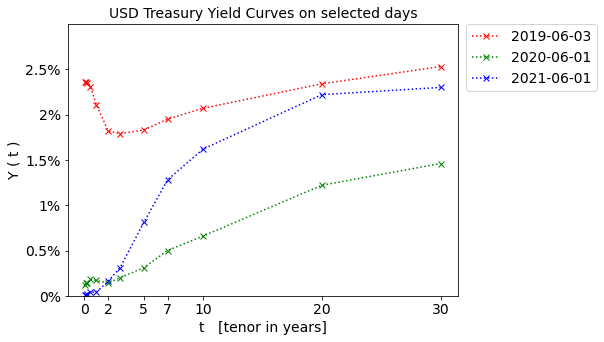

In [9]:
import matplotlib.pyplot as plt


def compare_yield_curves():
    """
    Plot yield curves
    """
    # --- settings ---
    fontsize = 14  # font size for the text of the current plot
    xticks = [0, 24, 60, 84, 120, 240, 360]
    yticks = [0, 0.5, 1, 1.5, 2, 2.5]
    ylim = [0, 3]

    # --- plotting ---
    plt.plot(*zip(*sorted(y_2019_06_03.items())), 'rx:', markersize=6, label='2019-06-03')
    plt.plot(*zip(*sorted(y_2020_06_01.items())), 'gx:', markersize=6, label='2020-06-01')
    plt.plot(*zip(*sorted(y_2021_06_01.items())), 'bx:', markersize=6, label='2021-06-01')
    plt.title('USD Treasury Yield Curves on selected days', fontsize=fontsize)
    plt.xlabel('t   [tenor in years]', fontsize=fontsize)
    plt.ylabel('Y ( t )', fontsize=fontsize)
    ax = plt.gca()
    ax.set_xticks(xticks)
    ax.set_xticklabels([str(int(tenor_measured_in_months/12)) for tenor_measured_in_months in xticks], 
                       fontsize=fontsize)
    ax.set_yticks(yticks)
    ax.set_yticklabels([str(y)+'%' for y in yticks], fontsize=fontsize)
    ax.set_ylim(ylim)
    plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=fontsize)

    fig = plt.gcf()
    fig.set_size_inches([7, 5])
    plt.show()

    
compare_yield_curves()

### Risk-free rate and Discounting
#### Risk-free investment (free of credit risk)

If you set up a contract, there is always a non-zero chance that something unexpected will happen.<br/>
The safest USD financial instruments are short-term US Treasury Bills, they are the least likely to have something unexpected.<br/>

Currently, short-term US T-Bills are the closest approximations of a risk-free investment,<br/>
because the US Treasury is very very likely to fulfill its payment obligations in the near future.

#### Risk-free rate
The theoretical concept of a `risk-free rate` is the rate of a risk-free investment.<br/>
Note, however, that the actual value of the risk-free rate may change tomorrow. This is called `interest rate risk`.

For example, you can enter a `risk-free` contract between now and time $\,T=3\,$ with an annualized percent yield of $\,\mathrm{APY}=2\%\,$.
<br/>
This risk-free contract will be a reference for all other contracts with the same tenor.


#### Discounting
Assume that at $\,T=3\,$ you will receive the amount of $\,100\,$. 
<br/>
Comparing to the risk-free $\,\mathrm{APY}=2\%\,$, this $\,100\,$ received at $\,T=3\,$ 
has the following normalized value to you: $\,\displaystyle{\frac{100}{\left(\,1+\mathrm{APY}\,\right)^{\,3}}}\,$.  


The normalization with the risk-free rate is called `discounting with the risk-free rate`.<br/>

#### Task: PV of your future payments

1. You and a bank just signed a contract. For the next 30 years at the end of each month you will pay $\,m=1$ USD.
2. Select one of the above USD yield curves.
3. Between 1 month and 360 months calculate each missing value with linear interpolation.
4. Convert each yield to APY.
5. Calculate the sum of the PVs of your payments.
6. Repeat the calculation with the other yield curve.
7. Why do you see a difference between the results obtained with the different yield curves ? 

###### Answer

_Helper functions: Linear interpolation, Discount factor, PV calculation_

In [20]:
import numpy as np
from numbers import Number

INTP_MAX_STEP_NUMBER = 10000
INTP_MIN_STEP_SIZE = 1.0e-6
NUMBER_OF_MONTHLY_PAYMENTS = 360


def interpolate_linear(xy_dict={}, x_from=None, x_to=None, x_step=None):
    """
    Linear interpolation of y(x) values at the x points  ( x_from, x_from + x_step,  x_from + 2 * x_step, ... )
    based on y values at the nearest available x values. 

    The x value of the last interpolation is strictly smaller than x_to, equality is not allowed.

    Available x, y pairs are listed in xy_dict.

    The returned dict contains only the interploated values.
    """
    xy_intp = dict()
    
    # --- testing inputs ---
    assert len(xy_dict.keys()) > 1, 'Interpolation needs at least two points'
    assert x_from is not None, 'Missing argument: x_from'
    assert x_to is not None, 'Missing argument: x_to'
    assert x_step is not None, 'Missing argument: x_step'

    assert all([isinstance(x, Number) for x in xy_dict.keys()]), 'All listed x values have to be numeric'
    assert all([isinstance(y, Number) for y in xy_dict.values()]), 'All listed y values have to be numeric'
    assert isinstance(x_from, Number), 'x_from has to be numeric'
    assert isinstance(x_to, Number), 'x_to has to be numeric'
    assert isinstance(x_step, Number), 'x_step has to be numeric'
    
    x_list, y_list = zip(*sorted(xy_dict.items()))
    x_intp = np.arange(x_from, x_to, x_step)  # x values of the interpolated points, np.arange allows float step
    
    assert x_list[0] <= x_intp[0], 'The x value of the first interpolated y must be >= the first available x value'
    assert x_intp[-1] <= x_list[-1], 'The x value of the last interpolated y must be <= the last available x value'
    assert x_step > 0.0, 'The step size between the x values of the interpolated points must be positive'
    assert x_intp[0] + x_step <= x_list[-1], 'Second x value of the interpolation must be <= the last available x value'

    assert (x_list[-1] - x_list[0]) / x_step <= INTP_MAX_STEP_NUMBER, \
        'The maximum number of interpolation steps is {}'.format(INTP_MAX_STEP_NUMBER)
    assert all([x_list[i] - x_list[i - 1] >= INTP_MIN_STEP_SIZE for i in range(1, len(x_list))]), \
        'The distance between neighboring listed x values has to be at least {}'.format(INTP_MIN_STEP_SIZE)
    
    # --- interpolation --- 
    i_intp = 0  # i_list and i_intp are the indexes of the known and requested x values
    i_list = 0
    while i_intp < len(x_intp) and i_list < len(x_list):
        # linear interpolation at x_intp[i_intp] based on nearest available known values
        r = (x_intp[i_intp] - x_list[i_list]) / (x_list[i_list + 1] - x_list[i_list])
        xy_intp[x_intp[i_intp]] = r * y_list[i_list + 1] + (1.0 - r) * y_list[i_list]
        
        # move to the next interpolated point such that x_list[i_list] <= x_intp[i_intp] < x_list[i_list + 1]
        # note that the second comparison is a sharp < relation, in other words, equality is not allowed
        i_intp += 1
        if i_intp < len(x_intp):            
            while x_list[i_list + 1] <= x_intp[i_intp]:
                i_list += 1

    return xy_intp


def quoted_percent_yield_to_discount_factor(quoted_percent_yield=None, tenor_in_years=None):
    annual_percent_yield = 100.0 * ( (1.0 + 0.5 * quoted_percent_yield / 100.0) ** 2.0 - 1.0 )
    continuous_rate = np.log(1.0 + tenor_in_years * annual_percent_yield / 100.0) / tenor_in_years
    discount_factor = np.exp(-1.0 * continuous_rate * tenor_in_years)
    
    return discount_factor
    

def calculate_pv(yield_curve_months=None, fixed_payment_amount=None):
    pv = 0.0
    y_intp = interpolate_linear(xy_dict=yield_curve_months, x_from=1, x_to=NUMBER_OF_MONTHLY_PAYMENTS, x_step=1)
    for tenor_in_months, quoted_percent_yield in y_intp.items():
        tenor_in_years = tenor_in_months / 12.0 
        discount_factor = quoted_percent_yield_to_discount_factor(quoted_percent_yield=quoted_percent_yield, 
                                                                  tenor_in_years=tenor_in_years)
        pv += fixed_payment_amount * discount_factor            

    return pv

_Calculate PVs_

Note the significant difference between the two PVs: $\,273.61\,$ vs $\,311.29\,$

What is the reason for this difference ? Can you explain ?

In [19]:
FIXED_PAYMENT_AMOUNT = 1


for start_time, yield_curve_months in zip(['2019-06-03', '2020-06-01'], [y_2019_06_03, y_2020_06_01]):
    pv = calculate_pv(yield_curve_months=yield_curve_months, fixed_payment_amount=FIXED_PAYMENT_AMOUNT)
    print(f'Start time: {start_time}, '
          f'Fixed monthly payment amount: {FIXED_PAYMENT_AMOUNT}, '
          f'Number of monthly payments: {NUMBER_OF_MONTHLY_PAYMENTS}. '
          f'PV: {pv:.2f}')

Start time: 2019-06-03, Fixed monthly payment amount: 1, Number of monthly payments: 360. PV: 273.61
Start time: 2020-06-01, Fixed monthly payment amount: 1, Number of monthly payments: 360. PV: 311.29


## Recommended

* Short rate - https://en.wikipedia.org/wiki/Short-rate_model#The_short_rate
* Compounding - https://en.wikipedia.org/wiki/Compound_interest